In [1]:
#!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

Guardo le dimensioni dei due file

In [5]:
train.shape

(4507, 21)

In [6]:
test.shape

(1127, 21)

# MI STAMPO LE FEATURE CHE COMPAIONO NEL TRAIN E NEL TEST

In [7]:
list(train)

['Churn',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [8]:
list(test)

['Churn',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

# MI STAMPO LA QUANTITA' DEI VALORI CHE ASSUMONO LE VARIE FEATURE 

In [9]:
for c in train.columns:
    print ("Features: ", c)
    print(train[c].value_counts())
    print("\n*****************\n")

Features:  Churn
No     3309
Yes    1198
Name: Churn, dtype: int64

*****************

Features:  customerID
6504-VBLFL    1
6497-TILVL    1
8080-POTJR    1
4680-KUTAJ    1
3158-MOERK    1
             ..
3452-SRFEG    1
7389-KBFIT    1
4277-BWBML    1
3744-ZRRDZ    1
8865-TNMNX    1
Name: customerID, Length: 4507, dtype: int64

*****************

Features:  gender
Male      2309
Female    2198
Name: gender, dtype: int64

*****************

Features:  SeniorCitizen
0    3788
1     719
Name: SeniorCitizen, dtype: int64

*****************

Features:  Partner
No     2328
Yes    2179
Name: Partner, dtype: int64

*****************

Features:  Dependents
No     3148
Yes    1359
Name: Dependents, dtype: int64

*****************

Features:  tenure
1     403
72    236
2     131
3     131
4     113
     ... 
59     36
28     35
38     35
49     30
0       8
Name: tenure, Length: 73, dtype: int64

*****************

Features:  PhoneService
Yes    4063
No      444
Name: PhoneService, dtype: int64


Rapido sguardo al dataset

In [10]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,3393-FMZPV,Female,0,No,No,25,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.25,2387.75
1,No,2669-QVCRG,Female,0,No,No,41,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),81.30,3190.65
2,No,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3,No,5799-JRCZO,Female,0,No,Yes,63,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.50,1215.1
4,Yes,2612-RRIDN,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,81.00,340.85


In [11]:
for c in test.columns:
    print ("Features: ", c)
    print(test[c].value_counts())
    print("\n*****************\n")

Features:  Churn
No     829
Yes    298
Name: Churn, dtype: int64

*****************

Features:  customerID
7129-ACFOG    1
4198-VFOEA    1
0691-IFBQW    1
1444-VVSGW    1
8590-OHDIW    1
             ..
5266-PFRQK    1
2985-JUUBZ    1
4770-UEZOX    1
3512-IZIKN    1
7547-EKNFS    1
Name: customerID, Length: 1127, dtype: int64

*****************

Features:  gender
Male      578
Female    549
Name: gender, dtype: int64

*****************

Features:  SeniorCitizen
0    940
1    187
Name: SeniorCitizen, dtype: int64

*****************

Features:  Partner
No     576
Yes    551
Name: Partner, dtype: int64

*****************

Features:  Dependents
No     803
Yes    324
Name: Dependents, dtype: int64

*****************

Features:  tenure
1     73
72    50
2     43
4     34
3     30
      ..
36     6
20     6
37     6
55     5
0      2
Name: tenure, Length: 73, dtype: int64

*****************

Features:  PhoneService
Yes    1019
No      108
Name: PhoneService, dtype: int64

*****************

F

# ci sono dei valori mancanti nel train e nel test

In [12]:
print("Valori mancanti:", (train["TotalCharges"]==" ").sum())

Valori mancanti: 8


In [13]:
print("Valori mancanti:", (test["TotalCharges"]==" ").sum())

Valori mancanti: 2


# osservo il tipo dei dati

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   object 
 1   customerID        4507 non-null   object 
 2   gender            4507 non-null   object 
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   object 
 5   Dependents        4507 non-null   object 
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   object 
 8   MultipleLines     4507 non-null   object 
 9   InternetService   4507 non-null   object 
 10  OnlineSecurity    4507 non-null   object 
 11  OnlineBackup      4507 non-null   object 
 12  DeviceProtection  4507 non-null   object 
 13  TechSupport       4507 non-null   object 
 14  StreamingTV       4507 non-null   object 
 15  StreamingMovies   4507 non-null   object 
 16  Contract          4507 non-null   object 


# Mi stampo il dataset per quanto riguarda solo i record che presentano i valori nulli 

In [15]:
train.loc[train['TotalCharges'] == ' ']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,No,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
989,No,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1402,No,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
1745,No,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
2210,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
3288,No,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
4030,No,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
4116,No,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,


# Sostituisco i valori nulli con NaN sia nel train sia nel test

In [16]:
train.TotalCharges= train["TotalCharges"].replace(' ',np.NaN)

In [17]:
test.TotalCharges= test["TotalCharges"].replace(' ',np.NaN)

# verifico che non ci siano più valori rappresentati dallo spazio

In [18]:
train.loc[train['TotalCharges'] == ' ']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [19]:
test.loc[test['TotalCharges'] == ' ']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [20]:
train.loc[train['customerID'] == '4472-LVYGI']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1745,No,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN


# applico una conversione alla feature TotalCharges

In [21]:

train["TotalCharges"] = pd.to_numeric(train["TotalCharges"])

In [22]:
test["TotalCharges"] = pd.to_numeric(test["TotalCharges"])

# verifico che non si siano persi valori nulli

In [23]:
print(train.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64


In [24]:
print(test.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64


# Dato che i valori nulli sono molto pochi li posso rimpiazzare con la media totale dei valori presenti nella colonna 'TotalCharges'

In [25]:
train['TotalCharges'].fillna(train['TotalCharges'].mean(), inplace=True)

In [26]:
test['TotalCharges'].fillna(test['TotalCharges'].mean(), inplace=True)

# verifico che non ci siano più valori nulli

In [27]:
print(train.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [28]:
print(test.isnull().sum())

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


# Rapida verifica per vedere che effettivamente per un costumerID che presentava valore nullo ora c'è la media

In [29]:
train.loc[train['customerID'] == '2520-SGTTA']

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
989,No,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,2292.592209


##  Encoding: i modelli ragionano in termini di NUMERI e non di stringhe. Per questo motivo, bisogna convertire i campi object in numeri.

In [30]:
from sklearn.preprocessing import LabelEncoder
Feature = ["Churn", "customerID", "gender", "Partner","Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
labelEncoder_X = LabelEncoder()
for element in Feature:
    train[element] = labelEncoder_X.fit_transform(train[element])
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   customerID        4507 non-null   int64  
 2   gender            4507 non-null   int64  
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   int64  
 5   Dependents        4507 non-null   int64  
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   int64  
 8   MultipleLines     4507 non-null   int64  
 9   InternetService   4507 non-null   int64  
 10  OnlineSecurity    4507 non-null   int64  
 11  OnlineBackup      4507 non-null   int64  
 12  DeviceProtection  4507 non-null   int64  
 13  TechSupport       4507 non-null   int64  
 14  StreamingTV       4507 non-null   int64  
 15  StreamingMovies   4507 non-null   int64  
 16  Contract          4507 non-null   int64  


In [31]:
from sklearn.preprocessing import LabelEncoder
Feature = ["Churn", "customerID", "gender", "Partner","Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
labelEncoder_X = LabelEncoder()
for element in Feature:
    test[element] = labelEncoder_X.fit_transform(test[element])
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             1127 non-null   int64  
 1   customerID        1127 non-null   int64  
 2   gender            1127 non-null   int64  
 3   SeniorCitizen     1127 non-null   int64  
 4   Partner           1127 non-null   int64  
 5   Dependents        1127 non-null   int64  
 6   tenure            1127 non-null   int64  
 7   PhoneService      1127 non-null   int64  
 8   MultipleLines     1127 non-null   int64  
 9   InternetService   1127 non-null   int64  
 10  OnlineSecurity    1127 non-null   int64  
 11  OnlineBackup      1127 non-null   int64  
 12  DeviceProtection  1127 non-null   int64  
 13  TechSupport       1127 non-null   int64  
 14  StreamingTV       1127 non-null   int64  
 15  StreamingMovies   1127 non-null   int64  
 16  Contract          1127 non-null   int64  


In [32]:
#profile=ProfileReport(train)
#profile.to_notebook_iframe()

## Mi stampo un grafico che mostra quanti come sono distribuiti i valori per Churn nel nostro dataset

<AxesSubplot:xlabel='Churn', ylabel='count'>

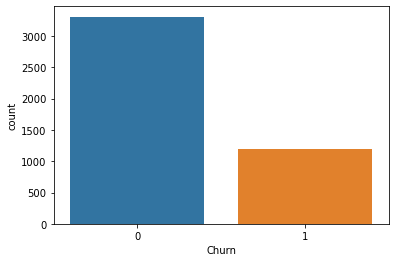

In [33]:
sns.countplot(x=train['Churn'])

nel grafico stampato qui sopra vediamo che nel dataset di train ci sono molti più valori di Churn pari a 0 rispetto a quelli che valgono 1

<AxesSubplot:xlabel='Churn', ylabel='count'>

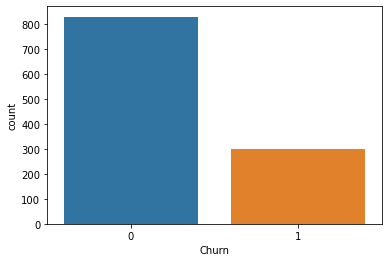

In [34]:
sns.countplot(x=test['Churn'])

nel grafico stampato qui sopra vediamo che anche nel dataset di test ci sono molti più valori di Churn pari a 0 rispetto a quelli che valgono 1

## Mi stampo dei grafici per capire le dipendenze e gli andamenti delle etichette per quanto riguarda le feature Contract Partner e Churn e fra le feature Tenure Contract e la Label Churn

<Figure size 1008x432 with 0 Axes>

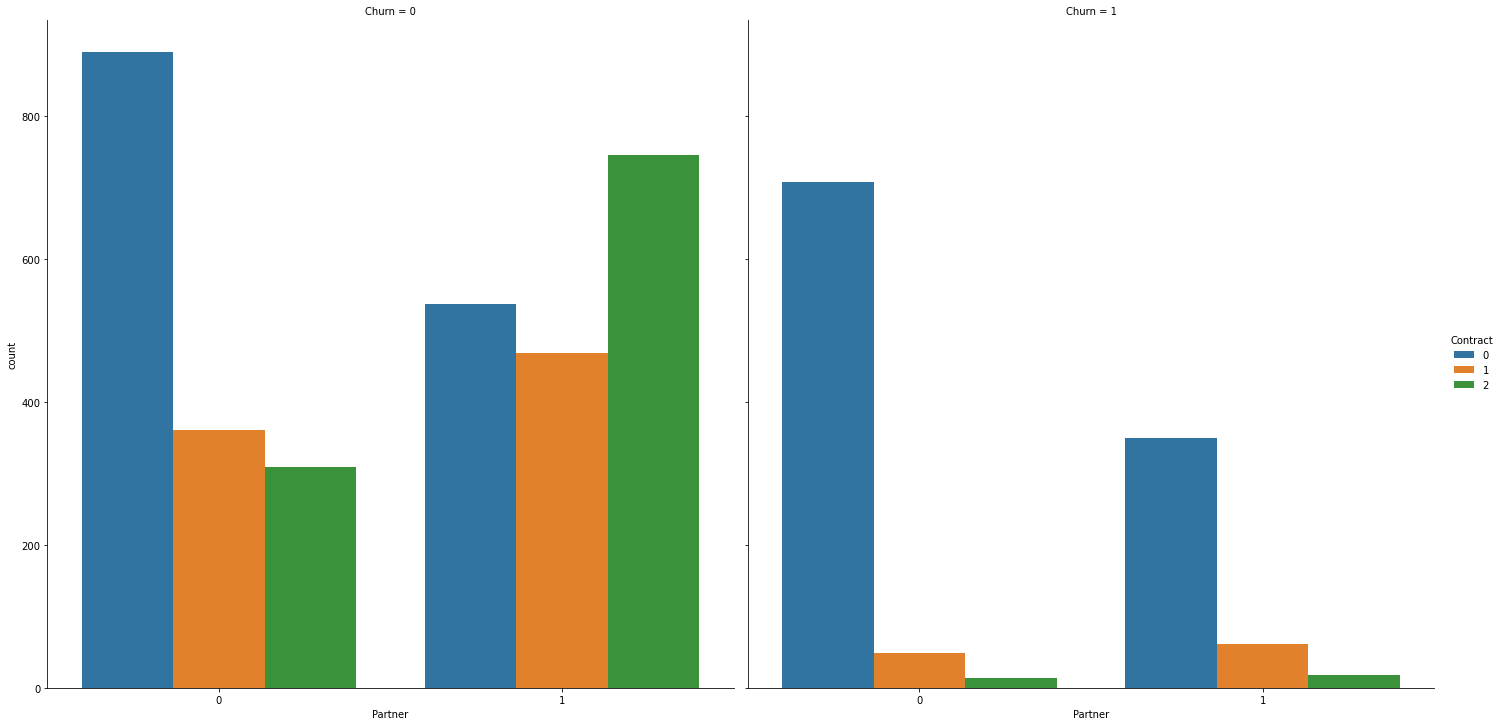

In [35]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='Partner', hue='Contract', col='Churn', data=train, kind='count', height=10, aspect=1)

- quelli che hanno il contratto per 1 anno e sono Partner non rinnovano. 
- quelli che hanno il contratto per 2 anni e sono Partner non rinnovano. 



<Figure size 1440x720 with 0 Axes>

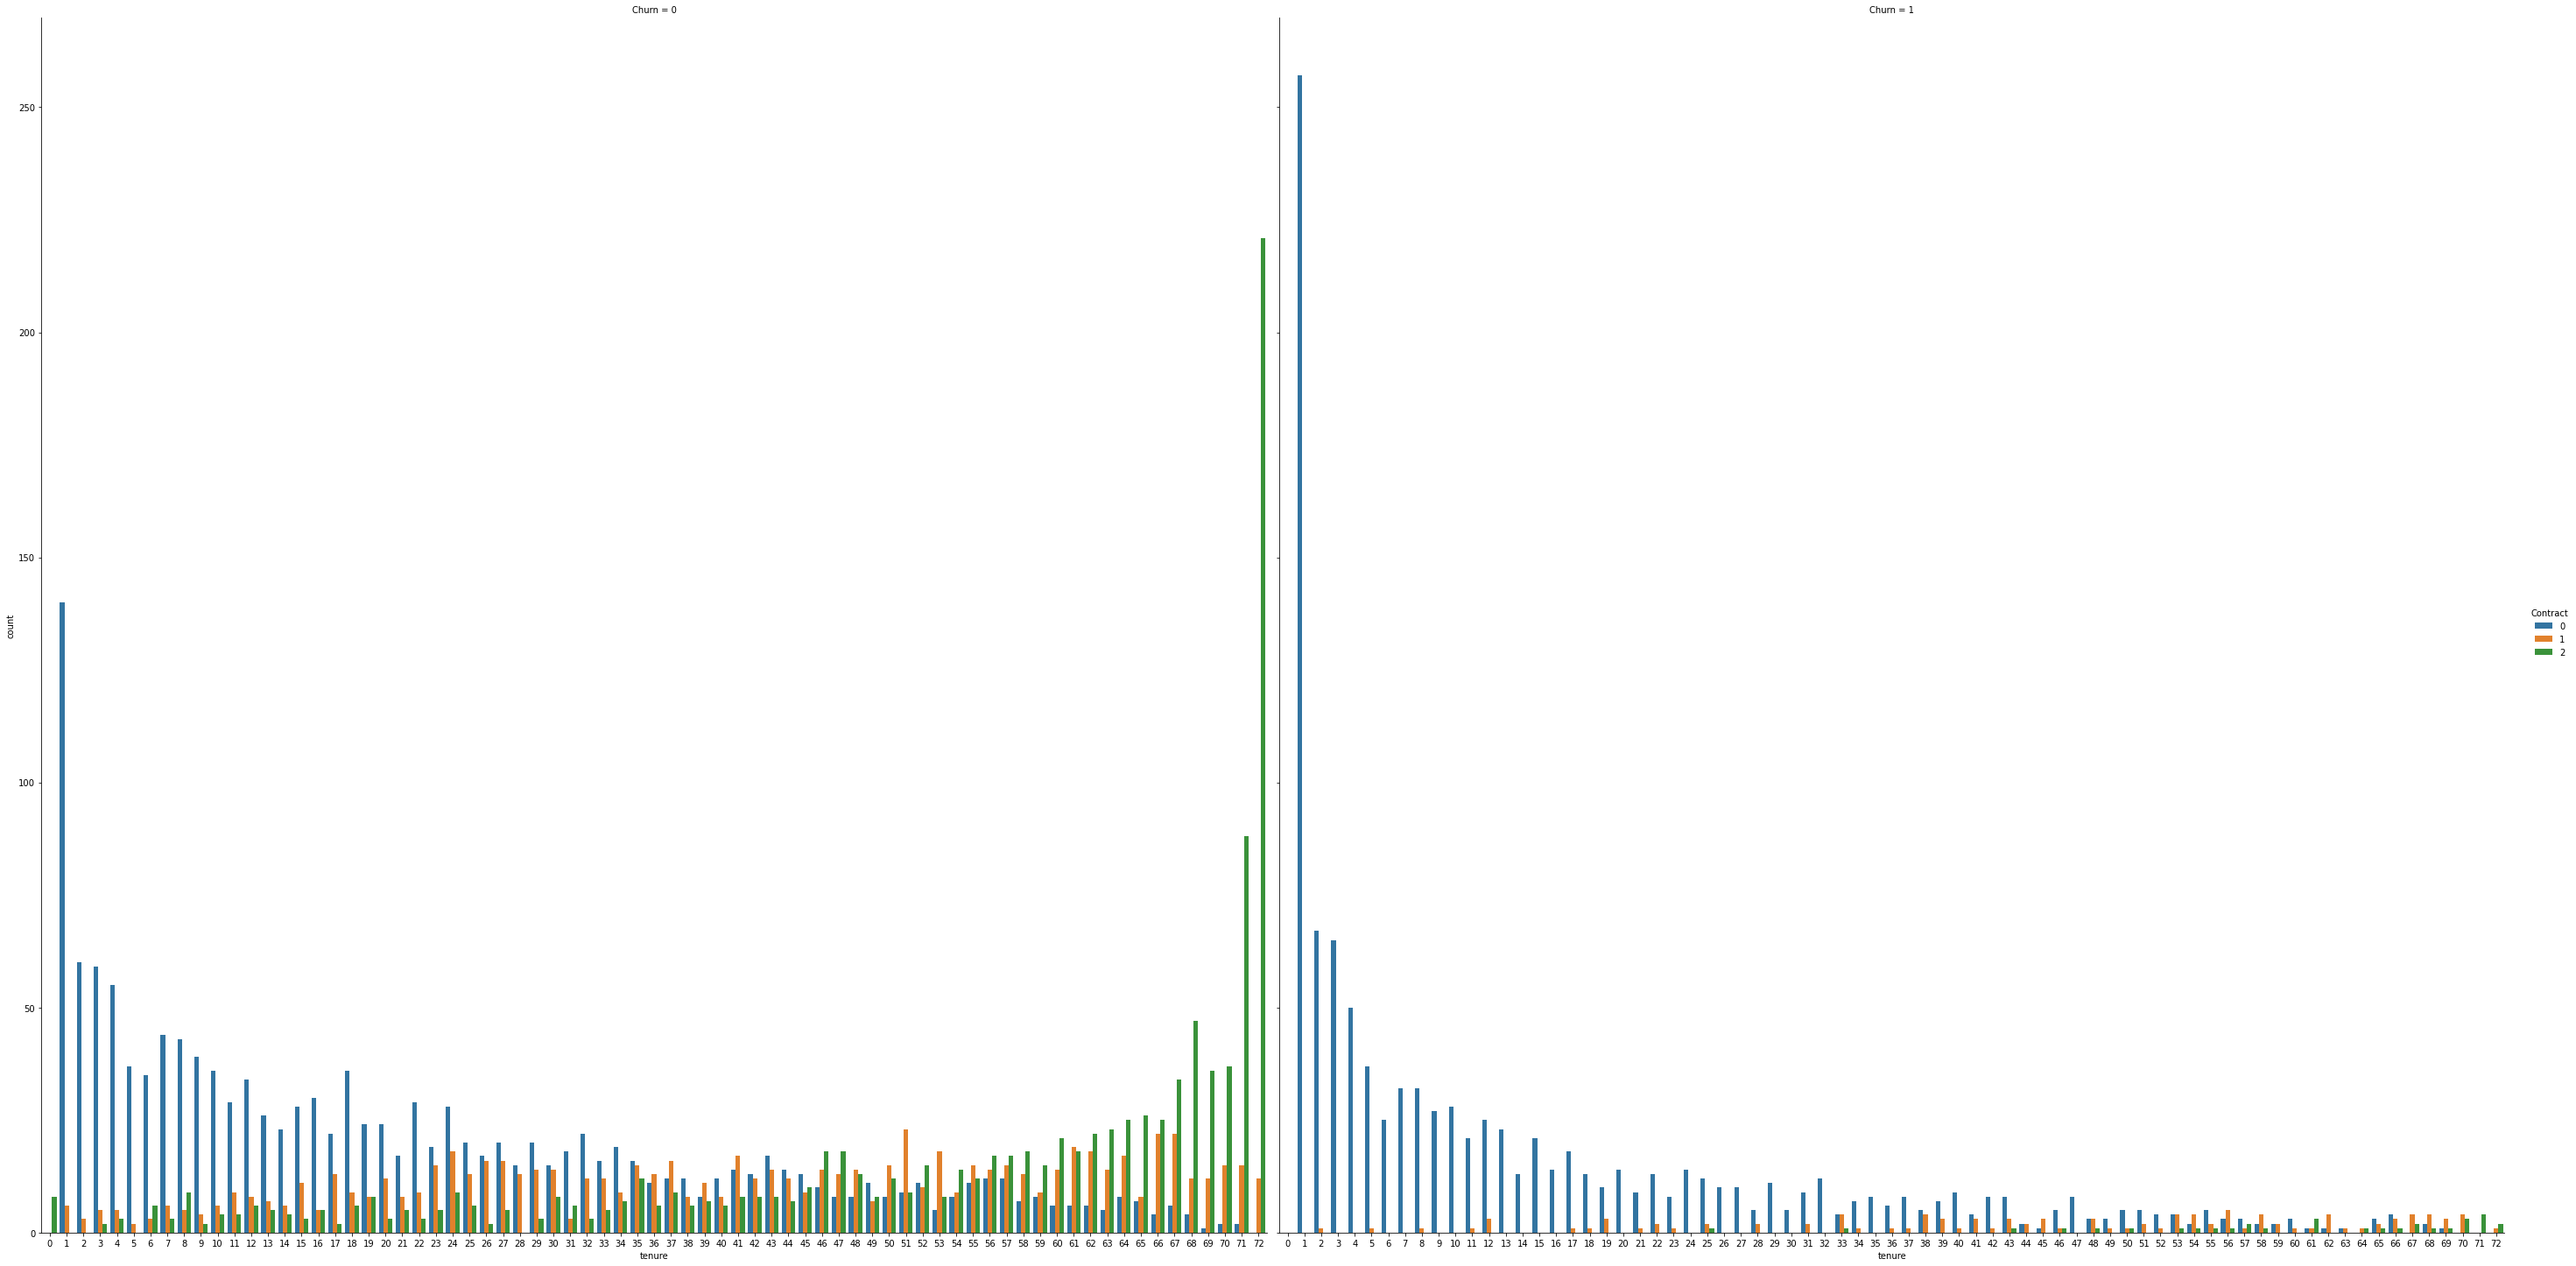

In [36]:
plt.figure(figsize=(20,10))
g=sns.catplot(x='tenure', hue='Contract', col='Churn', data=train, kind='count', height=20, aspect=1)

se un cliente è rimasto per 72 e ha la tipologia di contratto ad 1 anno molto probabilmente non rinnova

# Vedo se si può assumere da questi grafici che qualche feature sia superflua

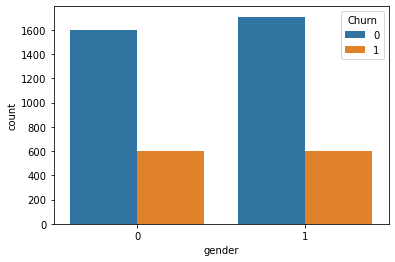

In [37]:
sns.countplot(x=train["gender"],hue=train["Churn"]);

La feature gender sembrerebbe superflua

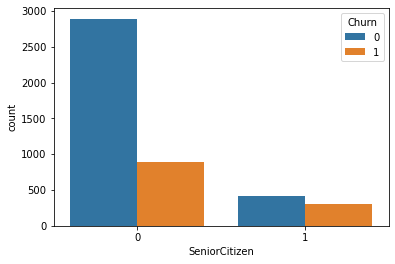

In [38]:
sns.countplot(x=train["SeniorCitizen"],hue=train["Churn"]);

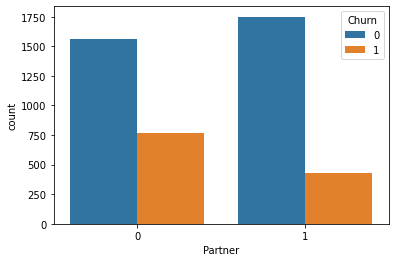

In [39]:
sns.countplot(x=train["Partner"],hue=train["Churn"]);

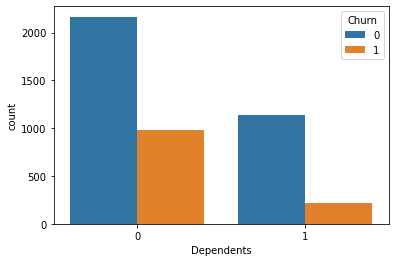

In [40]:
sns.countplot(x=train["Dependents"],hue=train["Churn"]);

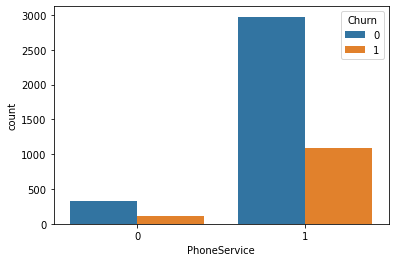

In [41]:
sns.countplot(x=train["PhoneService"],hue=train["Churn"]);

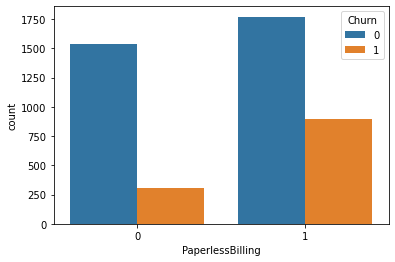

In [42]:
sns.countplot(x=train["PaperlessBilling"],hue=train["Churn"]);

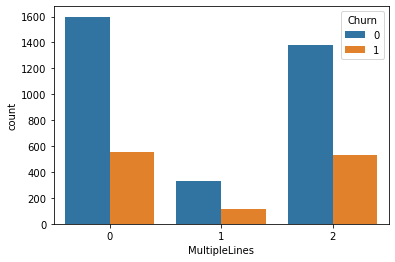

In [43]:
sns.countplot(x=train["MultipleLines"],hue=train["Churn"]);

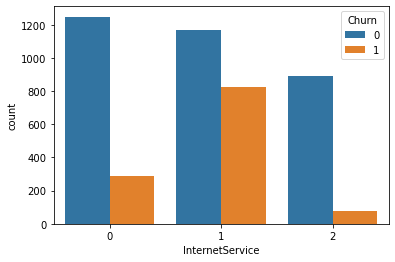

In [44]:
sns.countplot(x=train["InternetService"],hue=train["Churn"]);

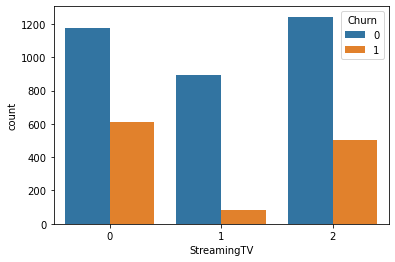

In [45]:
sns.countplot(x=train["StreamingTV"],hue=train["Churn"]);

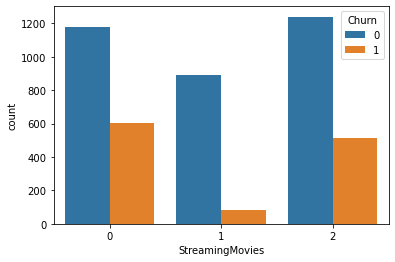

In [46]:
sns.countplot(x=train["StreamingMovies"],hue=train["Churn"]);

# Mi stampo una heatmap che mi guarda quale sia la correlazione che ho fra le feature:
- valore negativo -> relazione di proporzionalità inversa
- valore positivo -> relazione di proporzionalità diretta
- valore pari a zero-> no correlazione (feature può essere eliminata)

<AxesSubplot:>

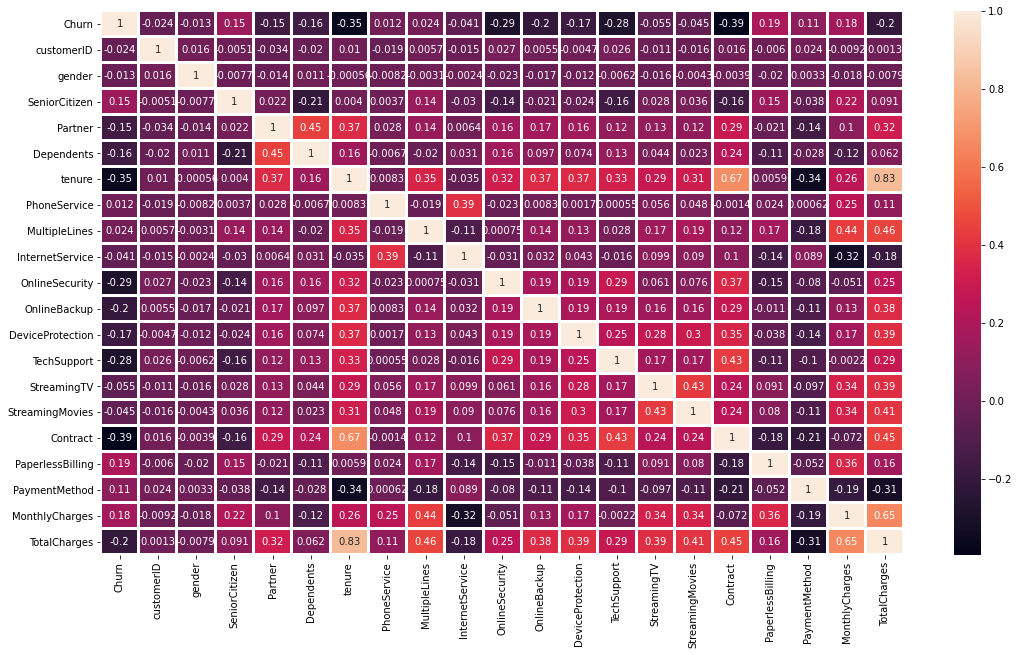

In [47]:
plt.figure(figsize=(18,10))
correlation = train.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

Dalla heatmap vediamo che le seguenti feature non sono utili per il nostro scopo:
- customerID
- gender 
- PhoneService 
- MultipleLines
- InternetService
- StreamingTv
- StreamingMovie 


Quindi si possono droppare


In [48]:
toDrop = ['customerID','gender','PhoneService','MultipleLines','InternetService', 'StreamingTV','StreamingMovies']
train = train.drop(toDrop, axis=1)

In [49]:

toDrop = ['customerID','gender','PhoneService','MultipleLines','InternetService', 'StreamingTV','StreamingMovies']
test = test.drop(toDrop, axis=1)

Vediamo inoltre nella heatmap che TotalCharges è molto correlato con Tenure in maniera direttamente proporzionale in quanto hanno una correlazione quasi pari a 1. quindi posso eliminare TotalCharges perchè ha una correlazione con Churn inferiore a quella che ha Tenure con Churn

In [50]:
toDrop = ['TotalCharges']
test = test.drop(toDrop, axis=1)

In [51]:
toDrop = ['TotalCharges']
train = train.drop(toDrop, axis=1)

# separo la label dalle features

In [52]:
y_train= train['Churn']
X_train=train.drop(['Churn'], axis=1)


y_test= test['Churn']
X_test=test.drop(['Churn'], axis=1)

# Utilizzo random forest
L’algoritmo come si può dedurre dal nome, è costituito da un insieme di alberi decisionali.
La classificazione delle istanze dei dati si ha muovendosi seguendo gli archi dalla radice (nodo iniziale dell’albero) ad una foglia dell’albero. 
Quest’ultima rappresenta il risultato predetto a partire dai valori dei vari attributi e quindi la classificazione del dato in input.
La caratteristica principale degli alberi decisionali è la loro abilità nello scegliere le features più importanti per poter dividere il set di dati in modo tale che i gruppi risultanti siano più diversi possibili fra di loro e quindi i membri del sottogruppo siano più simili possibili fra loro. 
Ciascuna regola di predizione è rappresentata dal cammino che va dal nodo radice al nodo foglia.
Per quanto riguarda la classificazione ogni singolo albero nella foresta genera una previsione di classe e la classe con maggior numero di voti diventa quindi la previsione del modello. 
Il vantaggio di avere più alberi decisionali risiede nel fatto che un gran numero di alberi non correlati protegge l’errore effettuato dai singoli alberi, in quanto mentre alcuni alberi potranno avere un output errato molti altri lo avranno corretto, quindi come gruppo gli alberi si muoveranno verso la corretta direzione.
In sostanza la maggioranza vince

In [53]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.metrics import accuracy_score

79.06


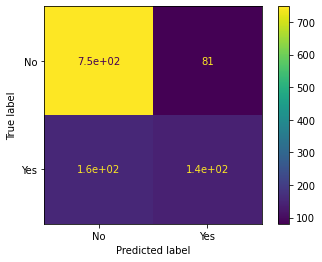

In [54]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

plot_confusion_matrix(randomforest, X_test, y_test, values_format='n', display_labels=['No','Yes']) 
plt.show() #sx predizioni giuste, dx predizioni sbagliate
print("\n")




In [55]:
models = pd.DataFrame({

    'Model': [ 'Random Forest'],

    'Score': acc_randomforest})
    
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,79.06


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       829
           1       0.64      0.48      0.55       298

    accuracy                           0.79      1127
   macro avg       0.73      0.69      0.71      1127
weighted avg       0.78      0.79      0.78      1127



Da quello che esce qui sopra infatti notiamo che lo 0 lo classifica abbastanza bene. Per quanto riguarda il valore 1 questo non succede in quanto come mostrato sopra lo 0 è molto più presente nel dataset rispetto all'1.